In [221]:
import pandas as pd
import json
import plotly.plotly as py
import plotly.graph_objs as go
import datetime
import time
import numpy as np
import matplotlib.pyplot as plt

In [222]:
in_file = "btc_candles_5m.json"
data = json.load(open(in_file))

## Convert datas to integers

In [223]:
df = pd.DataFrame(data['Items'], columns=['mts', 'open', 'close', 'high', 'low', 'volume'])
print(df.shape)
df.head()

(11731, 6)


,mts,open,close,high,low,volume
0,{'S': '1523301900000'},{'S': '6736.86545369'},{'S': '6721.09229148'},{'S': '6738'},{'S': '6721'},{'S': '45.99811741'}
1,{'S': '1522028700000'},{'S': '8392.6'},{'S': '8393.1'},{'S': '8401'},{'S': '8373.1'},{'S': '194.66606906'}
2,{'S': '1523130300000'},{'S': '6975.4'},{'S': '6985.1'},{'S': '6986.5'},{'S': '6972.4'},{'S': '38.48893769'}
3,{'S': '1522638900000'},{'S': '6953.8'},{'S': '6952.8'},{'S': '6958.9'},{'S': '6942'},{'S': '98.21134936'}
4,{'S': '1524631800000'},{'S': '9250'},{'S': '9263.6'},{'S': '9276'},{'S': '9200.5'},{'S': '924.07442798'}


In [224]:
# Convert values to numeric
df = df.applymap(lambda x: x.get('S'))
df = df.apply(pd.to_numeric)

In [225]:
# Convert timestamp to datetime
df['mts'] = df['mts'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000).strftime('%Y-%m-%d %H:%M:%S'))
df['mts'] = pd.to_datetime(df['mts'])

In [226]:
df.sort_values(by=['mts'],ascending=False).head()

,mts,open,close,high,low,volume
114,2018-04-25 20:05:00,9030.8,9006.8,9030.8,8990.00000,197.015641
7179,2018-04-25 20:00:00,9048.0,9030.7,9048.0,9030.00000,80.329649
5738,2018-04-25 19:55:00,9049.2,9047.4,9049.3,9038.90000,105.584278
4023,2018-04-25 19:50:00,9040.0,9049.1,9050.6,9028.00000,119.028502
11695,2018-04-25 19:45:00,9074.2,9040.1,9074.7,9035.71864,286.068958


## Plot Datas

In [227]:
# Plot datas
trace = go.Candlestick(x=df['mts'],
                       open=df['open'],
                       high=df['high'],
                       low=df['low'],
                       close=df['close'])

layout = go.Layout(
    xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)

data = [trace]

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='simple_candlestick')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Vico49/0 or inside your plot.ly account where it is named 'simple_candlestick'


## Clear Datas

In [204]:
df_sorted = df.sort_values('mts', axis=0)
df_sorted = df_sorted.reset_index(drop=True)
display(df_sorted.head())

,mts,open,close,high,low,volume
0,2018-02-18 16:05:00,10715.0,10724.0,10725.000000,10711.0,32.736687
1,2018-02-18 16:10:00,10725.0,10766.0,10790.000000,10724.0,292.561490
2,2018-02-18 16:15:00,10767.0,10820.0,10855.421627,10766.0,481.227888
3,2018-02-18 16:20:00,10819.0,10811.0,10830.000000,10784.0,154.277705
4,2018-02-18 16:25:00,10811.0,10791.0,10811.000000,10740.0,247.345571


#### En regardant les différences temporelles on va supprimer toutes les données inutilisables au début (trop d'écarts entre les données)

In [207]:
def observations_not_5minutes_long(x):
    # Do substraction between one observation time stamp and the one before
    diff = (x['mts'][1:] - x['mts'][0:-1])[1:]
    h_decal = np.vstack((x['mts'][0:-1], x['mts'][1:])).transpose()
    df_decal = pd.DataFrame(h_decal, columns=['mts1', 'mts2'])
    df_decal['diff'] = [(row['mts2'] - row['mts1']) for index, row in df_decal.iterrows()]
    display(df_decal[(df_decal['diff'] != df_decal['diff'][0])])
observations_not_5minutes_long(df_sorted)

,mts1,mts2,diff
177,2018-02-19 06:50:00,2018-03-09 11:55:00,18 days 05:05:00
222,2018-03-09 15:35:00,2018-03-14 16:25:00,5 days 00:50:00
225,2018-03-14 16:35:00,2018-03-14 17:45:00,0 days 01:10:00
272,2018-03-14 21:35:00,2018-03-15 12:20:00,0 days 14:45:00
279,2018-03-15 12:50:00,2018-03-15 19:55:00,0 days 07:05:00
281,2018-03-15 20:00:00,2018-03-15 20:10:00,0 days 00:10:00
287,2018-03-15 20:35:00,2018-03-15 21:00:00,0 days 00:25:00
1890,2018-03-21 10:30:00,2018-03-21 13:25:00,0 days 02:55:00
2905,2018-03-25 01:55:00,2018-03-25 03:00:00,0 days 01:05:00
7898,2018-04-11 11:00:00,2018-04-11 12:35:00,0 days 01:35:00


#####  ==> On enlève les données avant le 2018-03-15 21:00:00

In [ ]:
df_without_begining = df_sorted.iloc[288:]
df_without_begining = df_without_begining.reset_index(drop=True)

display(df_without_begining.head())

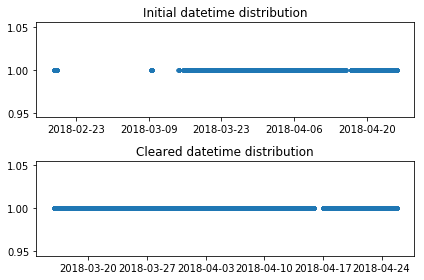

In [220]:
# Check With plots
plt.subplot(2, 1, 1)
plt.plot(df_sorted['mts'], np.ones(len(df_sorted['mts'])), '.')
plt.title('Initial datetime distribution')

plt.subplot(2, 1, 2)
plt.plot(df_without_begining['mts'], np.ones(len(df_without_begining['mts'])), '.')
plt.title('Cleared datetime distribution')

plt.tight_layout()
plt.show()

### Modify datas to get more usefull ones

#### Use differences between open and close, max, min rather than absolute values

## Modeles

### Méthode classsique sans prise en compte de la temporalité

In [17]:
df.head()

,mts,open,close,high,low,volume
0,2018-04-09 21:25:00,6736.865454,6721.092291,6738.0,6721.0,45.998117
1,2018-03-26 03:45:00,8392.600000,8393.100000,8401.0,8373.1,194.666069
2,2018-04-07 21:45:00,6975.400000,6985.100000,6986.5,6972.4,38.488938
3,2018-04-02 05:15:00,6953.800000,6952.800000,6958.9,6942.0,98.211349
4,2018-04-25 06:50:00,9250.000000,9263.600000,9276.0,9200.5,924.074428
